In [146]:
# CO line conversions routines 

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

from astropy.cosmology import Planck18 as Planck

In [148]:
#cosmo = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.315)


#cosmo = FlatLambdaCDM(H0=71 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.27)


cosmo = FlatLambdaCDM(H0=71 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.27)




In [149]:
# Table 4 from Bothwell

J = np.array([2,3,4,5,6,7])



r_J = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
r_J_err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])

invr_J = 1./r_J 
invr_J_err = 1/r_J * np.sqrt((r_J_err/r_J)**2)


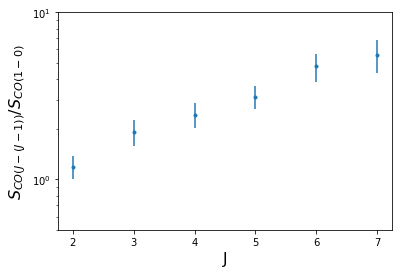

In [150]:
plt.errorbar(J,invr_J,yerr=invr_J_err,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$S_{CO(J-(J-1))}$/$S_{CO(1-0)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")

plt.savefig("CO_conversion.png",dpi=150)

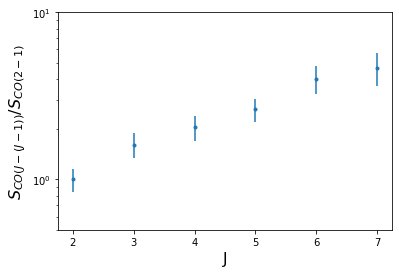

In [151]:
plt.errorbar(J,invr_J*0.84,yerr=invr_J_err*0.84,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$S_{CO(J-(J-1))}$/$S_{CO(2-1)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")


In [152]:
#Conversion from J-(J-1) to 1-0
def toC10(L,L_err,J):
    """
    Converts from luminosity J-(J-1) to 1-0 using
    Bothwell et al. 2013 Table 4 (MNRAS 429 3047)
    
    
    J: CO upper line transition [1,2,3,4,5,6,7] (int)
    L: CO line luminosity [K km s^-1 pc^2] (float)
    L_err: CO line flux uncertainty [K km s^-1 pc^2] (float)
    
    usage: for example to convert a luminosity of 
    10 pm 1 (K km s^-1 pc^2) from (3-2) to (1-0)
    we use toC10(3,10,1)
    
    The ratio of brightness temperature is the ratio
    of Luminosities according to Solomo 1997 eq 2
    """
    val = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
    err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])
        
    L_c = val[J-2]*L
    L_c_err = L_c*np.sqrt((L_err/L)**2+(err[J-2]/val[J-2])**2)
    return L_c,L_c_err


In [153]:
#nu of the CO line transitions
nu10 = 115.27120180
nu21 = 230.53800000
nu32 = 345.79598990
nu43 = 461.04076820
nu54 = 576.26793050
nu65 = 806.65180600

nurest = np.array([nu10,nu21,nu32,nu43,nu54,nu65])

def LpCO(I,I_err,z,J):
    """
    Calculates the Apparent CO line Luminosity from the line intensity, 
    frequency and redshift assuming a Planck Cosmology framework
    
    I: CO(J-(J-1)) velocity integrated flux [Jy km/s] (float)
    I_err: CO(J-(J-1)) velocity integrated flux uncertainty [Jy km/s] (float)
    z: redshift (float)
    J: Upper J transition (int)
    
    return: Apparent Luminosity of the CO emission line [K km/s pc^2] (float,float)
    """
    
    nu_rest = nurest[J-1]
    nu = nu_rest/(1.+z)
    DL = Planck.luminosity_distance(z).value
    #DL = cosmo.luminosity_distance(z).value
    LCO = 3.25e7*I*(nu**(-2))*(DL**2)*((1+z)**(-3))
    LCO_err = 3.25e7*I_err*(nu**(-2))*(DL**2)*((1+z)**(-3))
    return np.array([LCO,LCO_err])




In [154]:
cosmo.luminosity_distance(1+2).value 

25841.621561270313

In [155]:
LpCO(2.7,0.22,2.5146,1)/1e11    #8.169104276232614

array([8.31199626, 0.67727377])

In [128]:
LpCO(0.96,0.12,2.0078,1)/1e11   #1.9504219383449353

array([1.99859381, 0.24982423])

In [156]:
LpCO(1.20,0.20,2.7855,1)/1e11

array([4.39058096, 0.73176349])

In [157]:
LpCO(1.40,0.20,2.5833,1)/1e11


array([4.51192387, 0.64456055])

In [158]:
LpCO(1.00,0.18,2.7788,1)/1e11

array([3.64410827, 0.65593949])

In [159]:
LpCO(1.70,0.25,2.7256,1)/1e11

array([5.99749294, 0.88198426])

In [163]:
L1  = np.array([8.31199626,1.99859381,4.39058096,4.51192387,3.64410827,5.99749294])
L1e = np.array([0.67727377,0.24982423,0.73176349,0.64456055,0.65593949,0.88198426])
L2  = np.array([ 7.93, 1.91, 4.18, 4.29, 3.48, 5.77 ])
L2e = np.array([ 0.65, 0.24, 0.70, 0.61, 0.63, 0.85 ])

x0 = np.linspace(1.5,9)

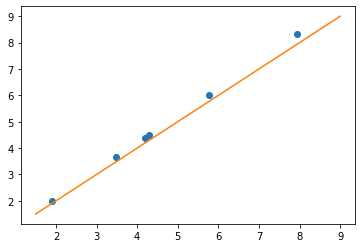

In [168]:
plt.plot(L2,L1,"o")
plt.plot(x0,x0,"-")

(0.9, 1.0)

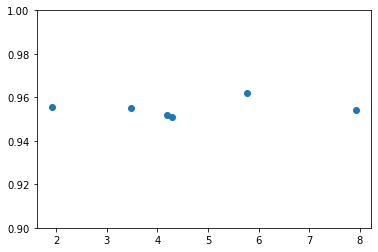

In [171]:
plt.plot(L2,L2/L1,"o")
plt.ylim(0.9,1.0)

In [129]:
#ID T ra dec z ICO ICOe SN V V_e LpCO LpCO_err LpCO10 LpCO10_err log10 M(H2) log10 M(H2)_err   
#0  1  2  3  4  5   6    7 8  9   10    11       12      13         14            15

ID,LpCO,LpCO_err,LpCO10,LpCO10_err = np.genfromtxt("Bothwell_2013",
                            usecols=(0,10,11,12,13),unpack=True,dtype=str)
ID,T,z,ICO,ICOe,V,V_e = np.genfromtxt("Bothwell_2013",
                            usecols=(0,1,4,5,6,8,9),unpack=True,dtype=str)
LpCO = np.array(LpCO,dtype=float)
LpCO_err = np.array(LpCO_err,dtype=float)
LpCO10 = np.array(LpCO10,dtype=float)
LpCO10_err = np.array(LpCO10_err,dtype=float)
V = np.array(V,dtype=float)
V_e = np.array(V_e,dtype=float)

In [134]:
#ID T z V Ve ICO ICOe LpCO LpCOe nu
#0  1 2 3 4   5   6     7    8   9

A16_ID,A16_V,A16_Ve,A16_LpCO,A16_LpCOe = np.genfromtxt("Aravena_2016",
                            usecols=(0,3,4,7,8),unpack=True,dtype=str)
A16_T,A16_ICO,A16_ICOe = np.genfromtxt("Aravena_2016",
                   usecols=(1,5,6),unpack=True,dtype=str)

A16_V = np.array(A16_V,dtype=float)
A16_Ve = np.array(A16_Ve,dtype=float)

A16_ICO = np.array(A16_ICO,dtype=float)
A16_ICOe = np.array(A16_ICOe,dtype=float)
A16_LpCO = np.array(A16_LpCO,dtype=float)*10
A16_LpCOe = np.array(A16_LpCOe,dtype=float)*10

2

In [144]:
A16_T

A16_J = []

for i in range(len(A16_T)):
    J =  int(A16_T[i][1:2])
    A16_J.append(J)

In [145]:
A16_J

[2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1]

In [135]:
A16_ICO

array([1.7 , 2.7 , 1.  , 1.8 , 2.15, 1.3 , 0.95, 0.96, 1.1 , 1.2 , 1.4 ,
       1.6 , 0.85, 1.  , 0.95, 1.25, 1.7 ])

In [111]:
#ID z ze SCO SCOe V Ve ICO ICOe LpCO LpCOerr 
#0  1  2  3   4   5  6  7   8    9     10

H12_ID,H12_V,H12_Ve,H12_LpCO,H12_LpCOe = np.genfromtxt("Harris_2012",
                         usecols=(0,5,6,9,10),unpack=True,dtype=str)
H12_V = np.array(H12_V,dtype=float)
H12_Ve = np.array(H12_Ve,dtype=float)
H12_LpCO = np.array(H12_LpCO,dtype=float)
H12_LpCOe = np.array(H12_LpCOe,dtype=float)

In [112]:
#G  Line    nu_obs  SCO     SCO_e   V     V_e   DV   DV_e  L'CO               S60   S100  logFIR  z
#           GHz     Jy km/s Jy km/s km/s  km/s  km/s km/s  10^10 K km/s pc^2  Jy    Jy    Lsun  

C11_ID,C11_V,C11_Ve,C11_LpCO = np.genfromtxt("Combes_2011",
                         usecols=(0,7,8,9),unpack=True,dtype=str)
C11_V = np.array(C11_V,dtype=float)
C11_Ve = np.array(C11_Ve,dtype=float)
C11_LpCO = np.array(C11_LpCO,dtype=float)

In [113]:
#G  Line    nu_obs  SCO     SCO_e   V     V_e   DV    DV_e  L'CO               S60   S100  logFIR  z
#           GHz     Jy km/s Jy km/s km/s  km/s  km/s  km/s  10^10 K km/s pc^2  Jy    Jy    Lsun  

C13_ID,C13_V,C13_Ve,C13_LpCO = np.genfromtxt("Combes_2013",
                         usecols=(0,7,8,9),unpack=True,dtype=str)
C13_V = np.array(C13_V,dtype=float)
C13_Ve = np.array(C13_Ve,dtype=float)
C13_LpCO = np.array(C13_LpCO,dtype=float)

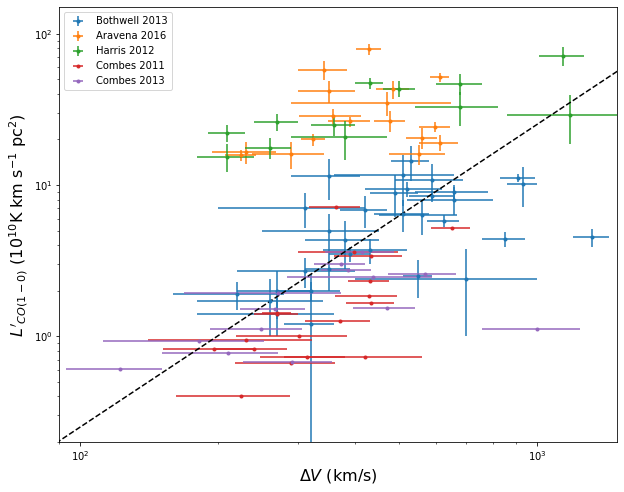

In [114]:

x0 = np.linspace(80,2000)
y0 = 10**5.4*x0**2/1e10



plt.figure(figsize=(10,8))

plt.errorbar(V,LpCO10,xerr=V_e,yerr=LpCO10_err,fmt=".",label="Bothwell 2013")

#plt.errorbar(V,LpCO,xerr=V_e,yerr=LpCO_err,fmt=".",label="Bothwell 2013")

plt.errorbar(A16_V,A16_LpCO,xerr=A16_Ve,yerr=A16_LpCOe,fmt=".",label="Aravena 2016")
plt.errorbar(H12_V,H12_LpCO,xerr=H12_Ve,yerr=H12_LpCOe,fmt=".",label="Harris 2012")


plt.errorbar(C11_V,C11_LpCO,xerr=C11_Ve,fmt=".",label="Combes 2011")

plt.errorbar(C13_V,C13_LpCO,xerr=C13_Ve,fmt=".",label="Combes 2013")



plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\Delta V$ (km/s)",fontsize=16)
plt.ylabel(r"$L'_{CO(1-0)}$ ($10^{10}$K km s$^{-1}$ pc$^2$)",fontsize=16)

plt.plot(x0,y0,"--",color="black")

plt.ylim(0.2,150)

plt.xlim(90,1500)

plt.legend()